In [2]:
import numpy as np
import pandas as pd,os
from scipy.stats import wilcoxon, friedmanchisquare, rankdata
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt

## Notes
+ NB tops ranking with both metrics for Noisy data
+ RF & LR (both simple & balanced) tops for Clean datasets. Interestingly, simple methods without imbalanced technique (RF & LR) performs better than rest.

In [3]:
def process(df,bigger_better=True):
    mat = df.drop(columns=['pr_rec_score'],axis=1,level=2).droplevel(2,axis=1)
    rank = mat.copy()
    for d in mat.index:
        if bigger_better:
            rank.loc[d] = rankdata(1 - mat.loc[d])
        else:
            rank.loc[d] = rankdata(mat.loc[d])
    return rank, mat

In [52]:
noisy = pd.read_csv("Noisy_final.csv",header=[0,1,2],index_col=0)
clean = pd.read_csv("Clean_final.csv",header=[0,1,2],index_col=0)
df = clean - noisy
boo = "Clean"
print(df.shape)

(32, 64)


In [38]:
rank, raw = process(df,bigger_better=True)

In [39]:
rank.mean().sort_values()

imb     clf  
None    nb        9.25000
tomek   nb        9.37500
smote   nb        9.65625
UBag    BagNB    10.12500
wilson  lr       10.28125
        svm      10.43750
        nb       10.50000
rus     svm      10.81250
UBag    BagDT    10.96875
rus     nb       11.46875
wilson  rf       11.65625
smote   svm      13.40625
        rf       14.84375
rus     rf       15.34375
tomek   lr       15.87500
wilson  knn      16.03125
smote   lr       16.59375
tomek   rf       17.00000
rus     lr       17.50000
None    lr       17.62500
tomek   svm      17.68750
        knn      18.53125
None    rf       18.87500
        svm      20.09375
rus     knn      20.18750
None    knn      20.81250
wilson  dt       21.15625
smote   knn      22.62500
tomek   dt       26.59375
rus     dt       27.28125
None    dt       27.68750
smote   dt       27.71875
dtype: float64

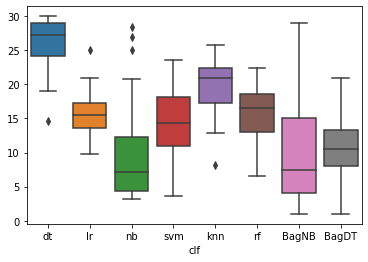

In [40]:
sns.boxplot(data=rank.mean(axis=1,level=1));

In [53]:
rank.mean(level=0,axis=1).mean()

smote     17.208333
rus       20.265625
wilson    11.812500
tomek     16.348958
None      17.963542
ens       13.203125
dtype: float64

In [54]:
rank.mean(level=1,axis=1).mean()

dt       24.81250
lr       14.26875
nb       17.60000
svm      15.02500
knn      19.43750
rf        9.17500
BagNB    17.65625
BagDT     8.75000
dtype: float64

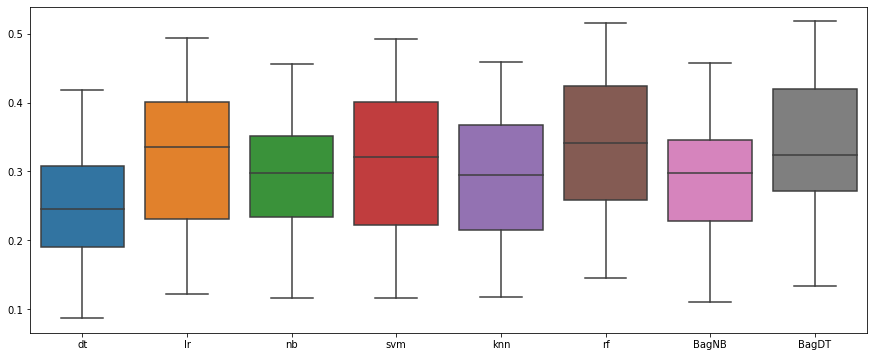

In [56]:
plt.figure(figsize=(15,6))
fig = sns.boxplot(data=raw.mean(level=1,axis=1));

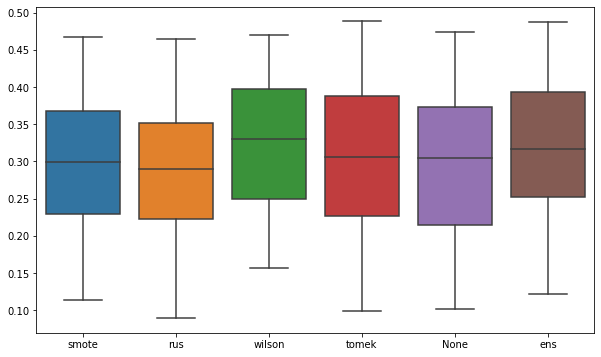

In [57]:
plt.figure(figsize=(10,6))
fig = sns.boxplot(data=raw.mean(level=0,axis=1));

In [58]:
nrank, nraw = process(noisy,bigger_better=True)
crank, craw = process(clean,bigger_better=True)

In [ ]:
def 

In [ ]:
lev = 0
cols = set(nraw.columns.get_level_values(lev))
dic = pd.DataFrame({c:nraw[c].values.reshape(-1) for c in cols})
dic

In [41]:
noisy_eval = pd.read_csv("Noisy_Eval_final.csv",header=[0],index_col=0)
noisy_eval.columns = pd.MultiIndex.from_tuples(map(eval,noisy_eval.columns))

In [42]:
rank, raw = process(noisy_eval,bigger_better=True)

In [43]:
rank.mean().sort_values()

wilson  rf        4.62500
smote   rf        7.34375
wilson  lr        7.56250
        svm       7.87500
ens     BagDT     8.75000
tomek   rf        9.46875
None    rf       10.18750
wilson  knn      12.40625
tomek   lr       12.75000
smote   svm      12.87500
rus     rf       14.25000
None    lr       14.96875
rus     svm      16.00000
tomek   nb       16.21875
None    nb       16.37500
tomek   svm      17.12500
smote   lr       17.25000
rus     nb       17.62500
ens     BagNB    17.65625
smote   nb       18.25000
tomek   knn      18.34375
rus     lr       18.81250
wilson  dt       18.87500
        nb       19.53125
None    knn      20.37500
smote   knn      21.12500
None    svm      21.25000
tomek   dt       24.18750
None    dt       24.62500
rus     knn      24.93750
smote   dt       26.40625
rus     dt       29.96875
dtype: float64

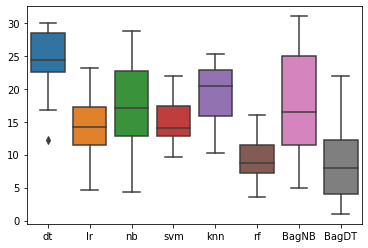

In [44]:
sns.boxplot(data=rank.mean(axis=1,level=1))